# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


from skimage import data, color, io, filters, exposure, morphology, util, segmentation, measure, feature
from skimage.filters import threshold_otsu, threshold_local, threshold_yen, threshold_li, threshold_isodata, threshold_triangle, threshold_mean, threshold_minimum, threshold_sauvola
from skimage.restoration import inpaint_biharmonic, denoise_bilateral, denoise_tv_chambolle
from skimage.feature import corner_peaks, corner_harris, canny, Cascade
from skimage.transform import rotate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

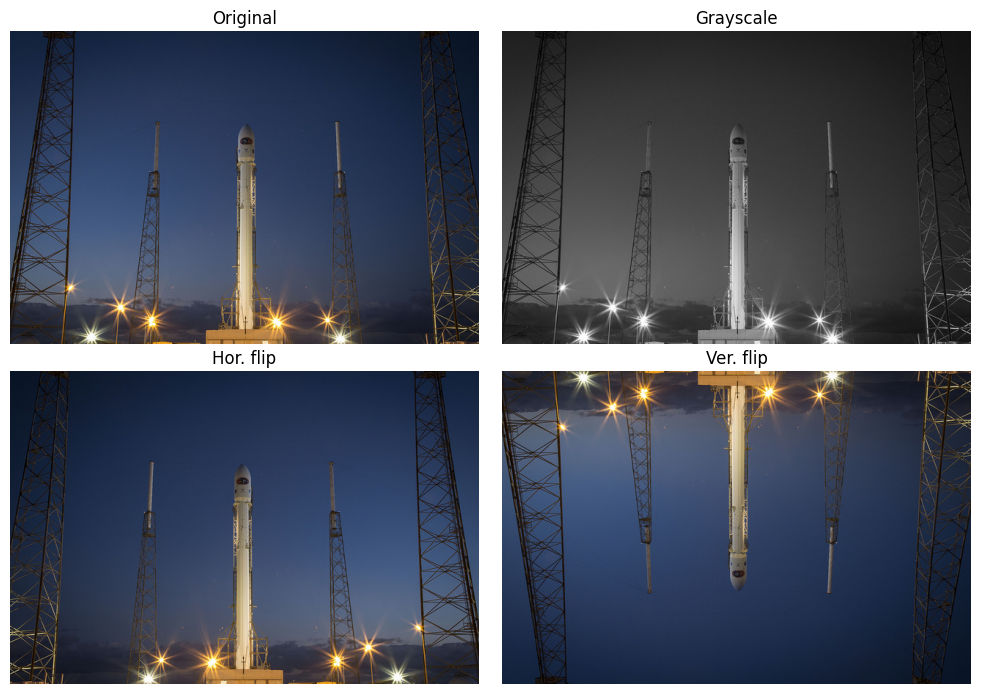

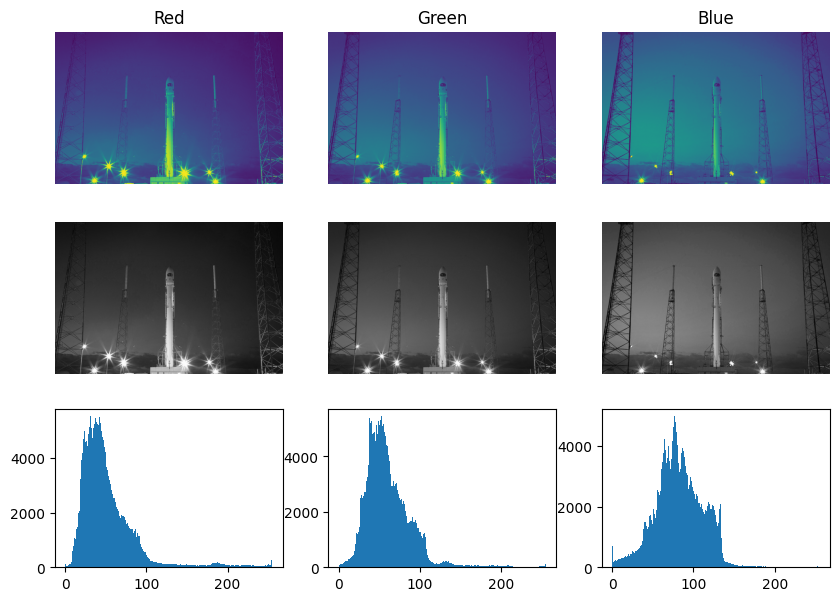

In [ ]:
rocket = data.rocket()
rocket_gray = color.rgb2gray(rocket)

fig1, axes1 = plt.subplots(2, 2, figsize=(10,7))

axes1[0, 0].imshow(rocket)
axes1[0, 0].set_title("Original")
axes1[0, 0].axis('off')

axes1[0, 1].imshow(rocket_gray, cmap='gray')
axes1[0, 1].set_title("Grayscale")
axes1[0, 1].axis('off')

axes1[1, 0].imshow(np.fliplr(rocket))
axes1[1, 0].set_title("Hor. flip")
axes1[1, 0].axis('off')

axes1[1, 1].imshow(np.flipud(rocket))
axes1[1, 1].set_title("Ver. flip")
axes1[1, 1].axis('off')

plt.tight_layout()



R = rocket[:, :, 0]
G = rocket[:, :, 1]
B = rocket[:, :, 2]

fig2, axes2 = plt.subplots(3, 3, figsize=(10,7))
axes2[0, 0].imshow(R)
axes2[0, 0].set_title("Red")
axes2[0, 0].axis('off')

axes2[0, 1].imshow(G)
axes2[0, 1].set_title("Green")
axes2[0, 1].axis('off')

axes2[0, 2].imshow(B)
axes2[0, 2].set_title("Blue")
axes2[0, 2].axis('off')

axes2[1, 0].imshow(R, cmap='gray')
axes2[1, 0].axis('off')

axes2[1, 1].imshow(G, cmap='gray')
axes2[1, 1].axis('off')

axes2[1, 2].imshow(B, cmap='gray')
axes2[1, 2].axis('off')

axes2[2, 0].hist(R.ravel(), bins=256)

axes2[2, 1].hist(G.ravel(), bins=256)

axes2[2, 2].hist(B.ravel(), bins=256)

plt.show()


# Task 2

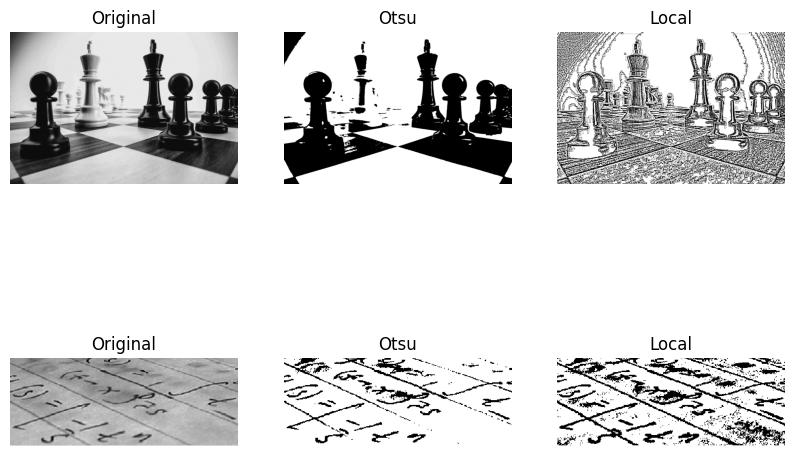

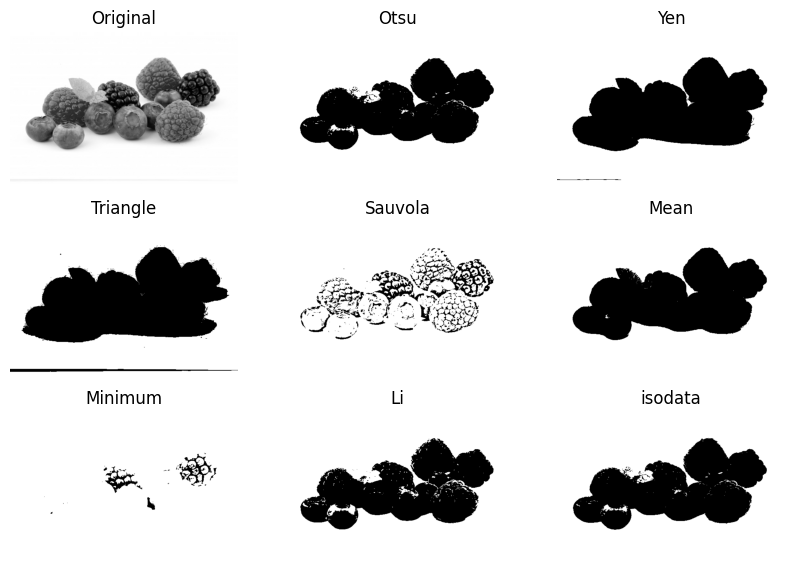

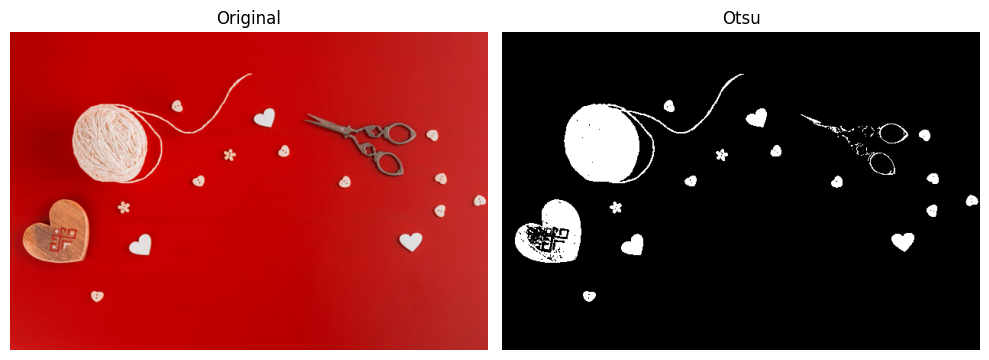

In [ ]:

chess = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_chess_pieces.png', as_gray=True)
text = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_text_page.png', as_gray=True)
fruits = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_fruits.png', as_gray=True)
shapes = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_shapes.png')


fig1, axes1 = plt.subplots(2, 3, figsize=(10,7))

axes1[0, 0].imshow(chess, cmap='gray')
axes1[0, 0].set_title('Original')
axes1[0, 0].axis('off')


chess_otsu = chess > threshold_otsu(chess)
axes1[0, 1].imshow(chess_otsu, cmap='gray')
axes1[0, 1].set_title('Otsu')
axes1[0, 1].axis('off')


chess_local = chess > threshold_local(chess, block_size=15, offset=0.0005)
axes1[0, 2].imshow(chess_local, cmap='gray')
axes1[0, 2].set_title('Local')
axes1[0, 2].axis('off')



axes1[1, 0].imshow(text, cmap='gray')
axes1[1, 0].set_title('Original')
axes1[1, 0].axis('off')



btext_otsu = text > threshold_otsu(text)
axes1[1, 1].imshow(btext_otsu, cmap='gray')
axes1[1, 1].set_title('Otsu')
axes1[1, 1].axis('off')


text_local = text > threshold_local(text, 65, offset=0.01)
axes1[1, 2].imshow(text_local, cmap='gray')
axes1[1, 2].set_title('Local')
axes1[1, 2].axis('off')


fig2, axes2 = plt.subplots(3, 3, figsize=(10,7))


axes2[0, 0].imshow(fruits, cmap='gray')
axes2[0, 0].set_title('Original')
axes2[0, 0].axis('off')



fruits_otsu = fruits > threshold_otsu(fruits)
axes2[0, 1].imshow(fruits_otsu, cmap='gray')
axes2[0, 1].set_title('Otsu')
axes2[0, 1].axis('off')


fruits_yen = fruits > threshold_yen(fruits)
axes2[0, 2].imshow(fruits_yen, cmap='gray')
axes2[0, 2].set_title('Yen')
axes2[0, 2].axis('off')

fruits_triangle = fruits > threshold_triangle(fruits)
axes2[1, 0].imshow(fruits_triangle, cmap='gray')
axes2[1, 0].set_title('Triangle')
axes2[1, 0].axis('off')

fruits_sauvola = fruits > threshold_sauvola(fruits)
axes2[1, 1].imshow(fruits_sauvola, cmap='gray')
axes2[1, 1].set_title('Sauvola')
axes2[1, 1].axis('off')

fruits_mean = fruits > threshold_mean(fruits)
axes2[1, 2].imshow(fruits_mean, cmap='gray')
axes2[1, 2].set_title('Mean')
axes2[1, 2].axis('off')

fruits_minimum = fruits > threshold_minimum(fruits)
axes2[2, 0].imshow(fruits_minimum, cmap='gray')
axes2[2, 0].set_title('Minimum')
axes2[2, 0].axis('off')

fruits_li = fruits > threshold_li(fruits)
axes2[2, 1].imshow(fruits_li, cmap='gray')
axes2[2, 1].set_title('Li')
axes2[2, 1].axis('off')

fruits_isodata = fruits > threshold_isodata(fruits)
axes2[2, 2].imshow(fruits_isodata, cmap='gray')
axes2[2, 2].set_title('isodata')
axes2[2, 2].axis('off')


# Best thresholding would be based on the task
# For example is we have to detect if there is object infornt of us we may use Yen as it apear to give less detail
# All of the used preproccesing (beside the original) may not be apropriate if we want to determine what fruits are on the pic. (We may even considen not using gray image at all)


fig3, ax3 = plt.subplots(1, 2, figsize=(10,7))


ax3[0].imshow(shapes)
ax3[0].set_title('Original')
ax3[0].axis('off')


gray_shapes = color.rgb2gray(shapes)

thresh_shapes = threshold_otsu(gray_shapes)
binary_shapes = gray_shapes > thresh_shapes
ax3[1].imshow(binary_shapes, cmap='gray')
ax3[1].set_title('Otsu')
ax3[1].axis('off')

plt.tight_layout()
plt.show()


# Task 3

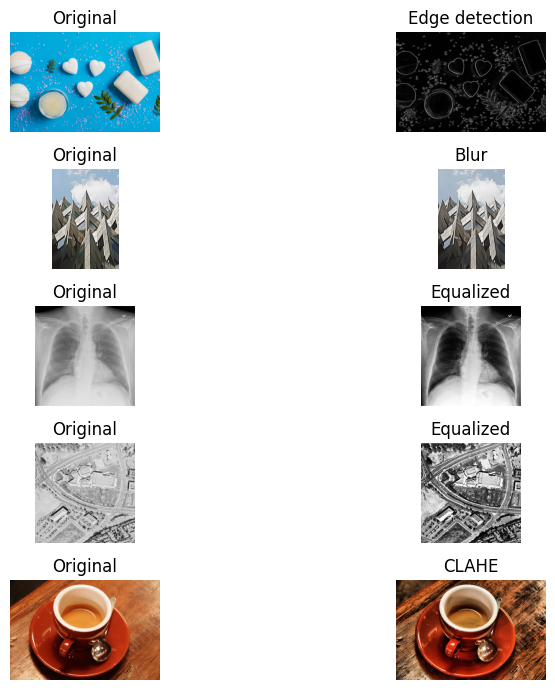

In [ ]:
soaps = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_soaps.jpg')
building = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_building_image.jpg')
xray = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_xray.png')
aerial = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_aerial.png')

coffee = data.coffee()

fig, axes = plt.subplots(5,2, figsize=(10,7))

axes[0, 0].imshow(soaps)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

soaps_gray = color.rgb2gray(soaps)
edges_sobel = filters.sobel(soaps_gray)

axes[0, 1].imshow(edges_sobel, cmap='gray')
axes[0, 1].set_title('Edge detection')
axes[0, 1].axis('off')



axes[1, 0].imshow(building)
axes[1, 0].set_title('Original')
axes[1, 0].axis('off')

building_blur = filters.gaussian(building)

axes[1, 1].imshow(building_blur)
axes[1, 1].set_title('Blur')
axes[1, 1].axis('off')



axes[2, 0].imshow(xray, cmap='grey')
axes[2, 0].set_title('Original')
axes[2, 0].axis('off')

xray_eq     = exposure.equalize_hist(xray)

axes[2, 1].imshow(xray_eq, cmap='grey')
axes[2, 1].set_title('Equalized')
axes[2, 1].axis('off')



axes[3, 0].imshow(aerial, cmap='grey')
axes[3, 0].set_title('Original')
axes[3, 0].axis('off')

aerial_eq   = exposure.equalize_hist(aerial)

axes[3, 1].imshow(aerial_eq, cmap='gray')
axes[3, 1].set_title('Equalized')
axes[3, 1].axis('off')



axes[4, 0].imshow(coffee)
axes[4, 0].set_title('Original')
axes[4, 0].axis('off')

coffe_CLAHE = exposure.equalize_adapthist(coffee, clip_limit=0.03)

axes[4, 1].imshow(coffe_CLAHE)
axes[4, 1].set_title('CLAHE')
axes[4, 1].axis('off')




plt.tight_layout()
plt.show()

# Task 4

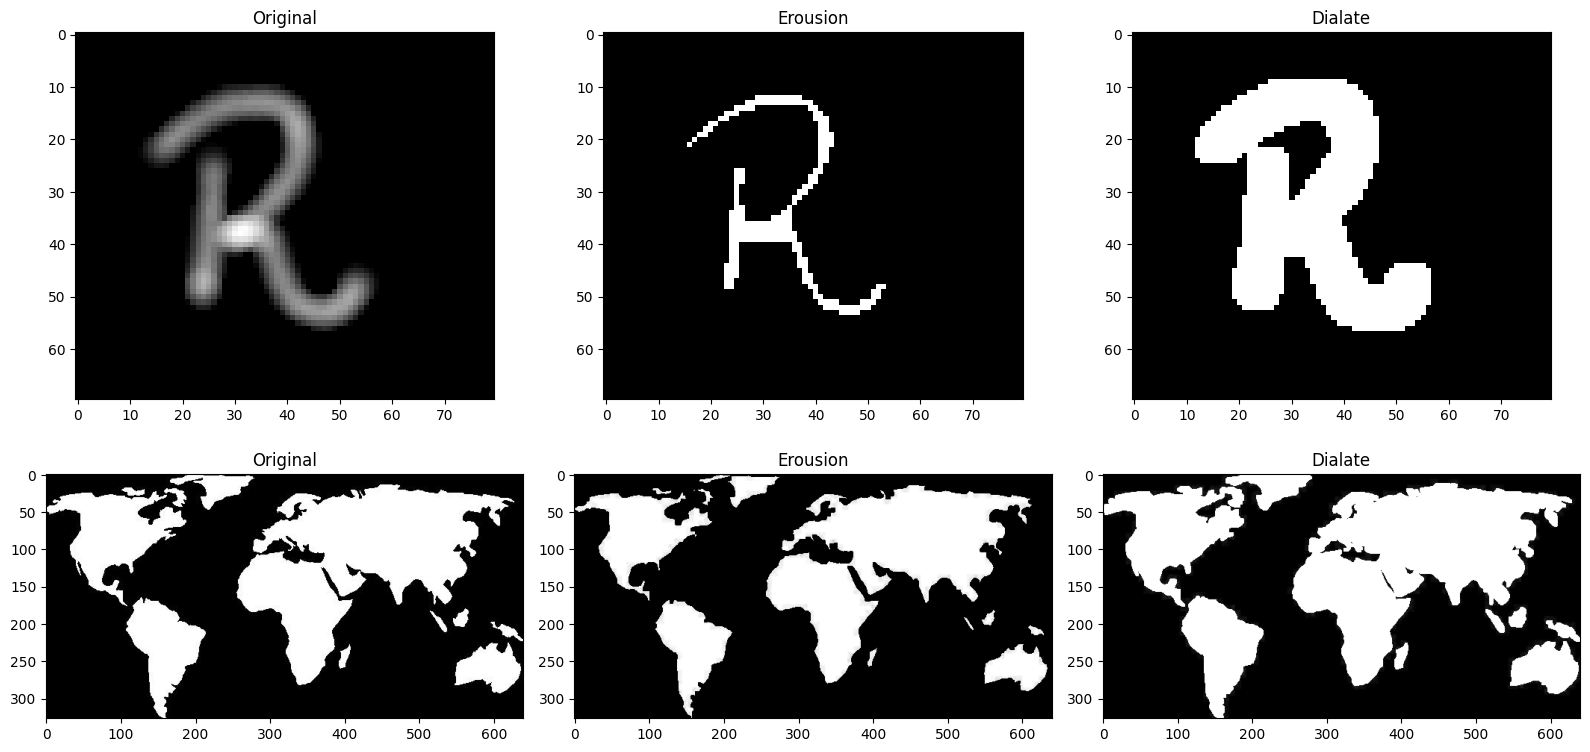

In [ ]:
r5 = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_r5.png', as_gray=True)
continents = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_continents.jpg', as_gray=True)

r5_bin = r5 > filters.threshold_otsu(r5)


footprint = morphology.footprint_rectangle((4, 4))


r5_erode = morphology.erosion(r5_bin, footprint)
r5_dilate = morphology.dilation(r5_bin, footprint)


continent_erode = morphology.erosion(continents, footprint)
continent_dilate = morphology.dilation(continents, footprint)


fig, axes = plt.subplots(2, 3, figsize=(16, 8))


axes[0, 0].imshow(r5, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 1].imshow(r5_erode, cmap='gray')
axes[0, 1].set_title('Erousion')
axes[0, 2].imshow(r5_dilate, cmap='gray')
axes[0, 2].set_title('Dialate')


axes[1, 0].imshow(continents, cmap='gray')
axes[1, 0].set_title('Original')
axes[1, 1].imshow(continent_erode, cmap='gray')
axes[1, 1].set_title('Erousion')
axes[1, 2].imshow(continent_dilate, cmap='gray')
axes[1, 2].set_title('Dialate')


plt.tight_layout()
plt.show()

# Task 5

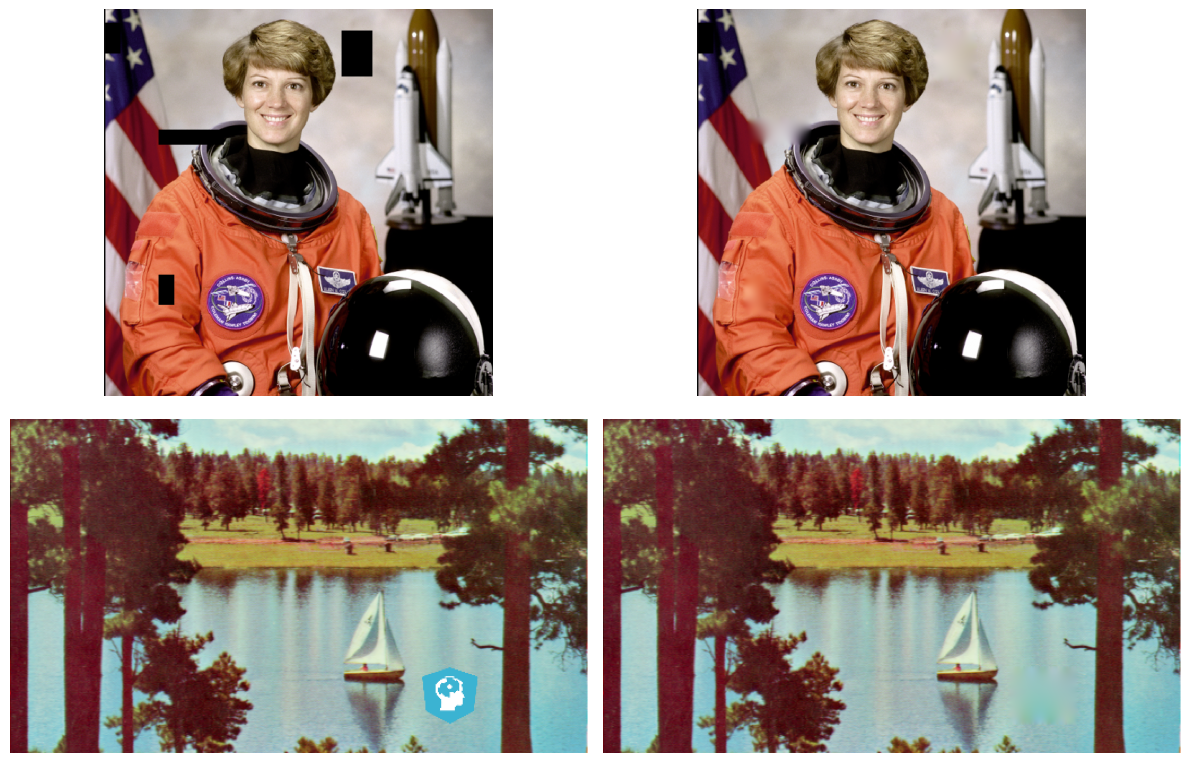

In [87]:
astro = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_damaged_astro.png')
logo = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_logo_image.png')


astro_mask = np.zeros(astro.shape[:2])
logo_mask = np.zeros(logo.shape[:2])


astro_mask[30:100, 330:390] = 1
astro_mask[150:190, 70:160] = 1
astro_mask[370:425, 65:100] = 1

logo_mask[220:270, 360:420] = 1


astro_inpainted = inpaint_biharmonic(astro, astro_mask, channel_axis=-1)
logo_inpainted = inpaint_biharmonic(logo, logo_mask, channel_axis=-1)




fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(astro)
axes[0, 0].axis('off')

axes[0, 1].imshow(astro_inpainted)
axes[0, 1].axis('off')

axes[1, 0].imshow(logo)
axes[1, 0].axis('off')

axes[1, 1].imshow(logo_inpainted)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


# Task 6

In [ ]:
fruits = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_fruits_generic.png')
dog = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_miny.png')
landscape = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_landscape.jpg')
lady = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_lady.jpg')

noise_fruits = util.random_noise(fruits)
denose_dog = filters.gaussian(dog)
denose_landscape = denoise_bilateral(landscape, channel_axis=2)
segments_lady = segmentation.slic(lady, n_segments=400, channel_axis=2)

segmented_lady_image = color.label2rgb(segments_lady, lady, kind='avg')


fig, axes = plt.subplots(4, 2, figsize=(16, 20))

axes[0, 0].imshow(fruits)
axes[0, 0].axis('off')
axes[0, 1].imshow(noise_fruits)
axes[0, 1].axis('off')



axes[1, 0].imshow(dog)
axes[1, 0].axis('off')
axes[1, 1].imshow(denose_dog)
axes[1, 1].axis('off')

axes[2, 0].imshow(landscape)
axes[2, 0].axis('off')
axes[2, 1].imshow(denose_landscape)
axes[2, 1].axis('off')

axes[3, 0].imshow(lady)
axes[3, 0].axis('off')
axes[3, 1].imshow(segmented_lady_image)
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Task 7

In [14]:
%reset -f

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


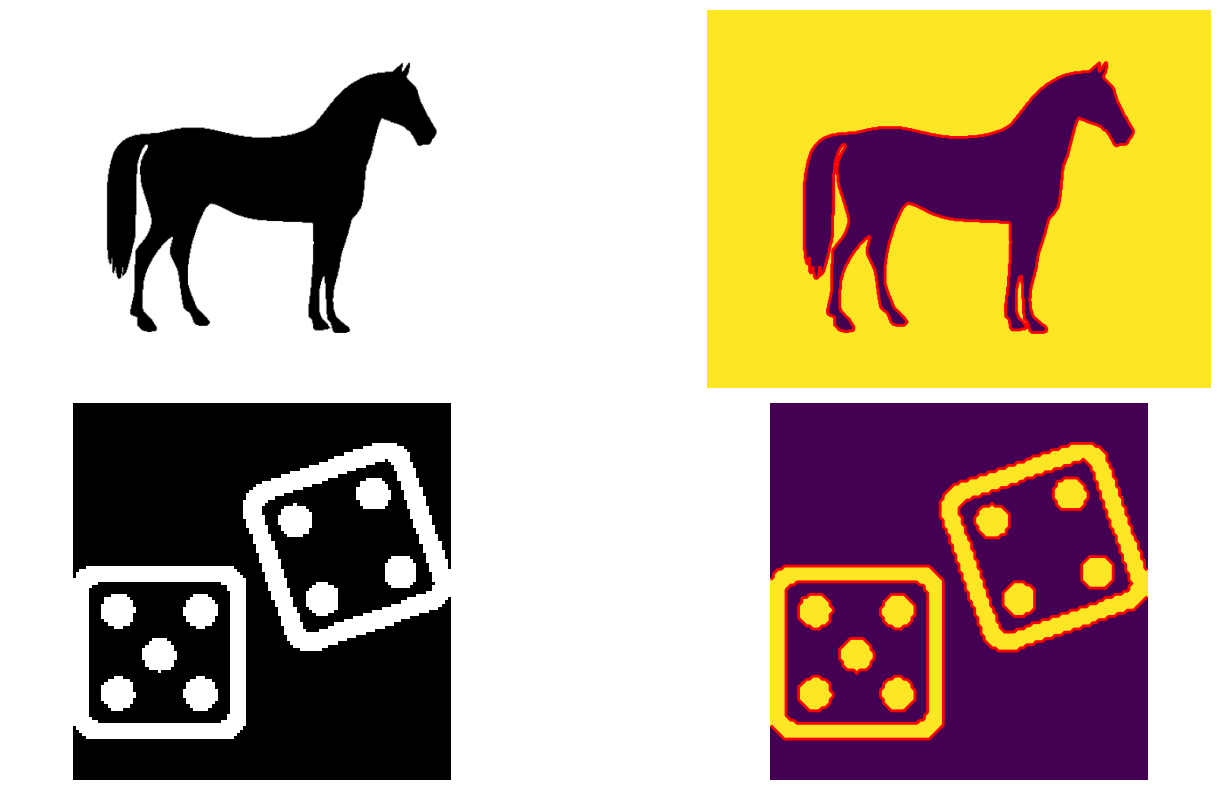

Number of dots in dice: 9.


In [4]:
horse = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_horse.png', as_gray=True)
dice = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_dice.png')

dice_gray = color.rgb2gray(dice)
dice_binary = dice_gray > filters.threshold_otsu(dice_gray)

horse_contours = measure.find_contours(horse, level=0.5)
dice_contours = measure.find_contours(dice_binary, level=0.5) #I don't know why it works as binary but, not as gray. For the hourse it worked

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0, 0].imshow(horse, cmap='grey')
axes[0, 0].axis('off')
axes[0, 1].imshow(horse)
axes[0, 1].axis('off')
for contour in horse_contours:
  axes[0, 1].plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')


axes[1, 0].imshow(dice_binary, cmap='grey')
axes[1, 0].axis('off')

axes[1, 1].imshow(dice_binary)
axes[1, 1].axis('off')
for contour in dice_contours:
  axes[1, 1].plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')



plt.tight_layout()
plt.show()

print(f'Number of dots in dice: {len(dice_contours) - 4}.')

# Task 8

With min_distance=10 and threshold_rel=0.01 we detect a total 91 corners in the image.
With min_distance=10 and threshold_rel=0.02 we detect a total 89 corners in the image.
With min_distance=20 and threshold_rel=0.03 we detect a total 65 corners in the image.
With min_distance=60 and threshold_rel=0.02 we detect a total 20 corners in the image.


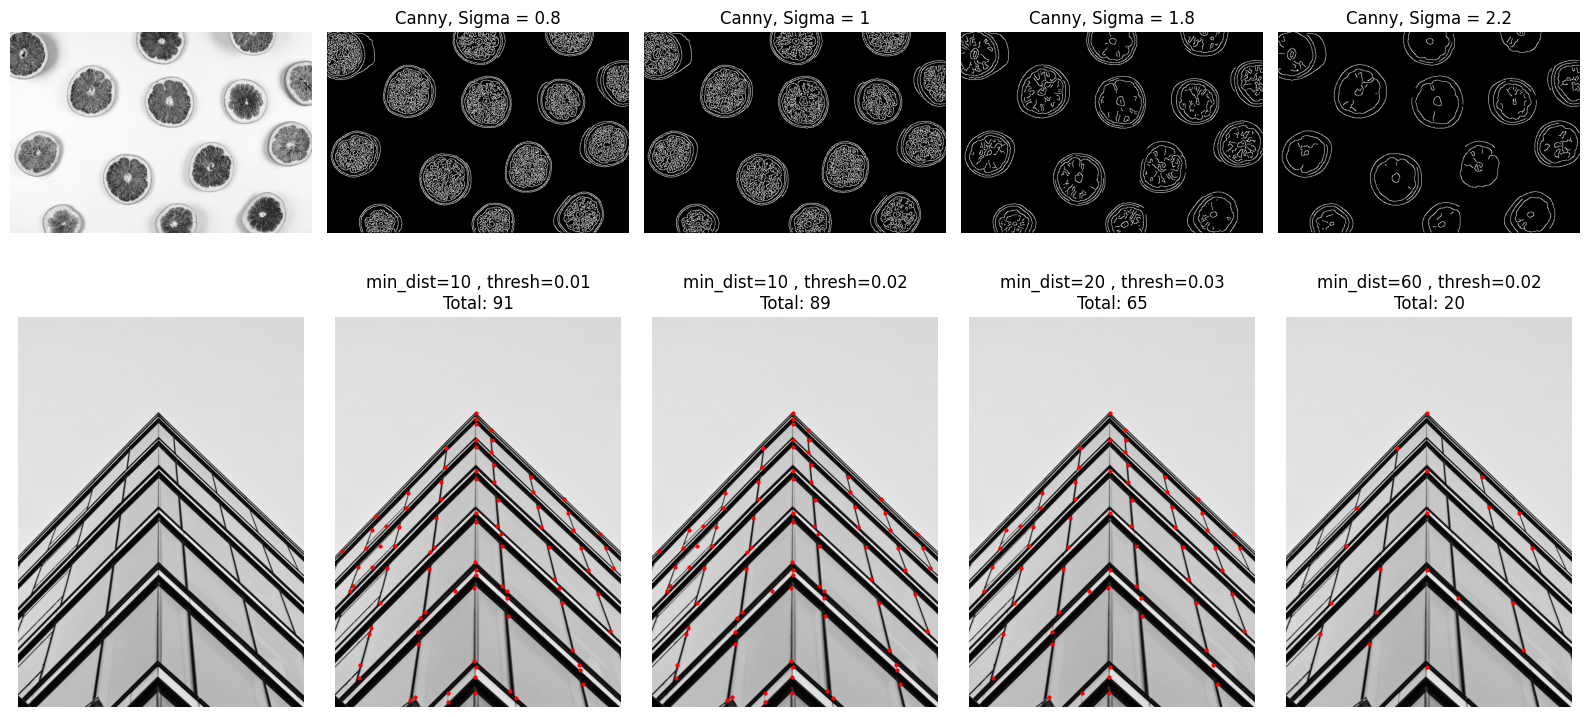

In [32]:
grapefruit = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_grapefruit.jpg', as_gray=True)
building = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_single_building.jpg', as_gray=True)

sigma_values = [ 0.8, 1, 1.8, 2.2 ]
corner_params = [ (10, 0.01), (10, 0.02), (20, 0.03), (60, 0.02) ]



fig, axes = plt.subplots(2, 5, figsize=(16, 8))

axes[0, 0].imshow(grapefruit, cmap='gray')
axes[0, 0].axis('off')

for i, sigma in enumerate(sigma_values):
  edges = canny(grapefruit, sigma=sigma)
  axes[0, i+1].imshow(edges, cmap='gray')
  axes[0, i+1].set_title(f'Canny, Sigma = {sigma}')
  axes[0, i+1].axis('off')

for i, (min_dist, thresh) in enumerate(corner_params):
  coords = corner_peaks(corner_harris(building), min_distance=min_dist, threshold_rel=thresh)
  axes[1, i + 1].imshow(building, cmap='gray')
  axes[1, i + 1].plot(coords[:, 1], coords[:, 0], 'r.' ,markersize=4)
  count = coords.shape[0]
  axes[1, i + 1].set_title(f'min_dist={min_dist} , thresh={thresh}\nTotal: {count}')
  axes[1, i + 1].axis('off')

  print(f'With min_distance={min_dist} and threshold_rel={thresh} we detect a total {count} corners in the image.')

axes[1, 0].imshow(building, cmap='gray')
axes[1, 0].axis('off')


plt.tight_layout()
plt.show()

# Task 9

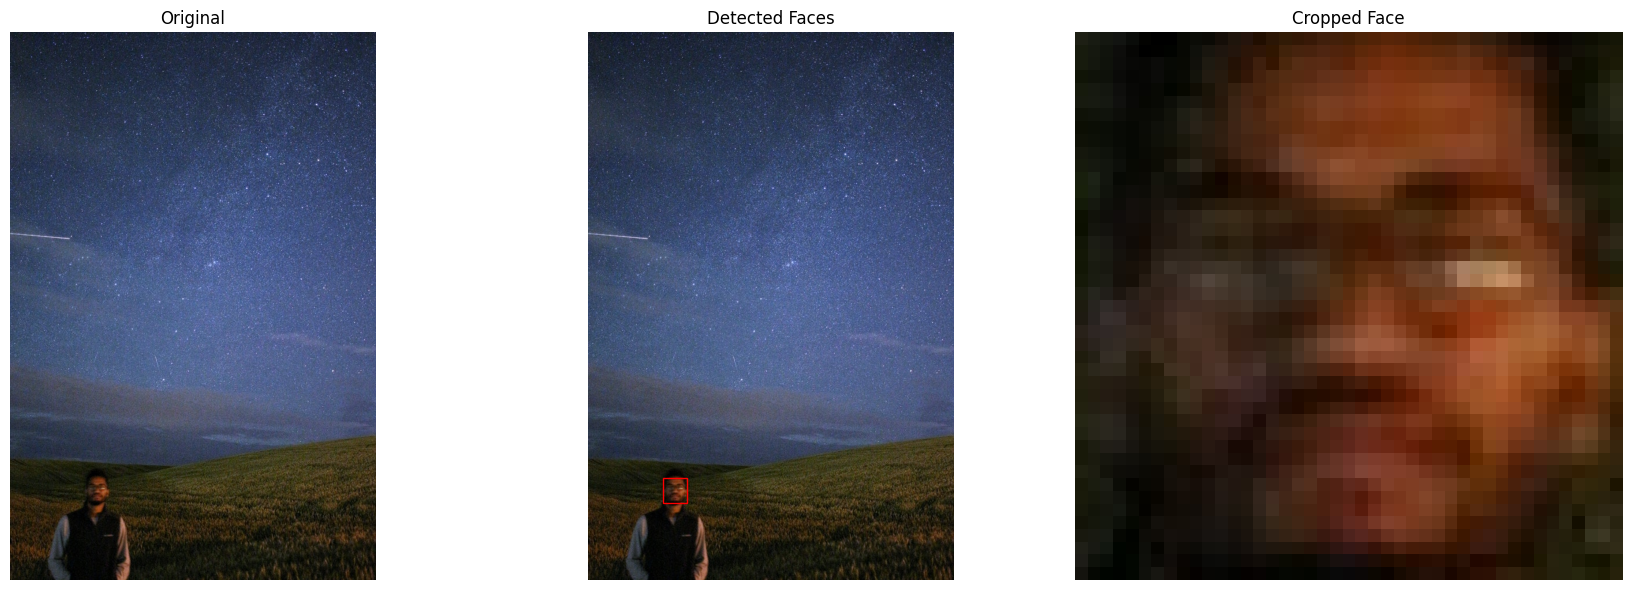

In [14]:
person_nigth = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_person_at_night.jpg')


trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(xml_file=trained_file)

gray_perosn_nigth = color.rgb2gray(person_nigth)
detected = detector.detect_multi_scale(
  img=gray_perosn_nigth,
  scale_factor=1.2,
  step_ratio=1,
  min_size=(10, 10),
  max_size=(200, 200)
)
#print(detected)

face_crops = []
for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  face_crop = person_nigth[r:r+h, c:c+w]
  face_crops.append(face_crop)



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(person_nigth)
axes[0].set_title("Original")
axes[0].axis('off')


axes[1].imshow(person_nigth)
axes[1].set_title("Detected Faces")
axes[1].axis('off')

for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  rect = Rectangle((c, r), w, h, edgecolor='red', facecolor='none')
  axes[1].add_patch(rect)


axes[2].axis('off')
axes[2].set_title("Cropped Face")
axes[2].imshow(face_crops[0])

plt.tight_layout()
plt.show()

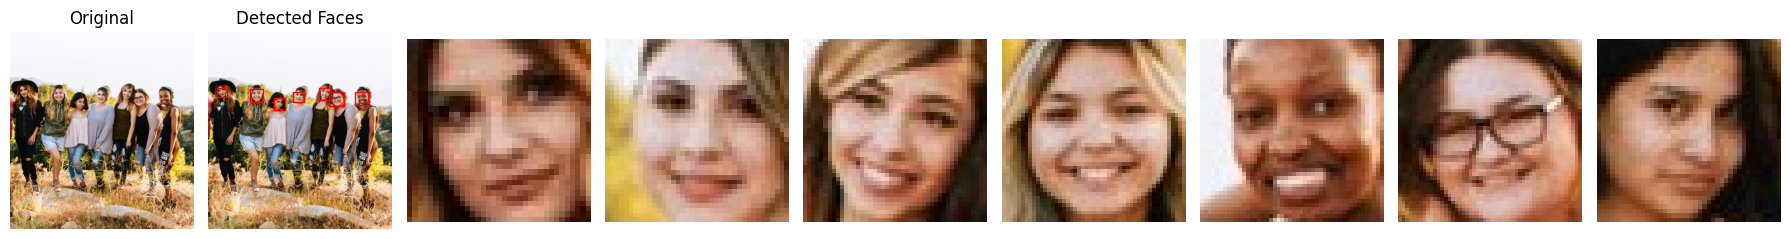

In [15]:
freinds = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_friends.jpg')

trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(xml_file=trained_file)

gray_freinds = color.rgb2gray(freinds)
detected = detector.detect_multi_scale(
  img=gray_freinds,
  scale_factor=1.2,
  step_ratio=1,
  min_size=(10, 10),
  max_size=(200, 200)
)

face_crops = []
for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  face_crop = freinds[r:r+h, c:c+w]
  face_crops.append(face_crop)



fig, axes = plt.subplots(1, 2 + len(face_crops), figsize=(18, 6))

axes[0].imshow(freinds)
axes[0].set_title("Original")
axes[0].axis('off')


axes[1].imshow(freinds)
axes[1].set_title("Detected Faces")
axes[1].axis('off')

for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  rect = Rectangle((c, r), w, h, edgecolor='red', facecolor='none')
  axes[1].add_patch(rect)


for i, face_crop in enumerate(face_crops):
  axes[2 + i].axis('off')
  axes[2 + i].imshow(face_crop)


plt.tight_layout()
plt.show()

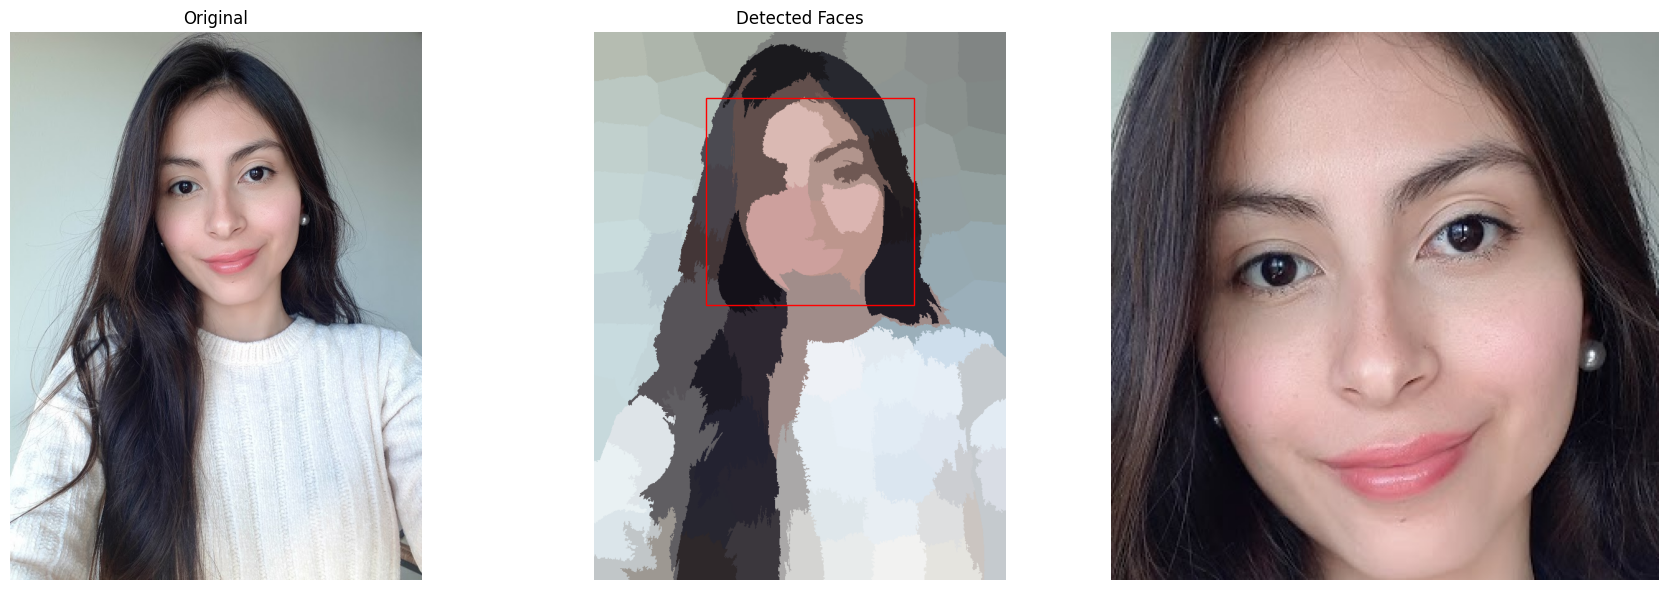

In [22]:
profile = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_profile.jpg')

trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(xml_file=trained_file)

segments = segmentation.slic(profile, n_segments=100)
segmented_image = color.label2rgb(segments, profile, kind='avg')

gray_profile_segmented = color.rgb2gray(segmented_image)
detected = detector.detect_multi_scale(
  img=gray_profile_segmented,
  scale_factor=1.2,
  step_ratio=1,
  min_size=(10, 10),
  max_size=(400, 400)
)




face_crops = []
for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  face_crop = profile[r:r+h, c:c+w]
  face_crops.append(face_crop)



fig, axes = plt.subplots(1, 2 + len(face_crops), figsize=(18, 6))

axes[0].imshow(profile)
axes[0].set_title("Original")
axes[0].axis('off')


axes[1].imshow(segmented_image)
axes[1].set_title("Detected Faces")
axes[1].axis('off')

for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']
  rect = Rectangle((c, r), w, h, edgecolor='red', facecolor='none')
  axes[1].add_patch(rect)


for i, face_crop in enumerate(face_crops):
  axes[2 + i].axis('off')
  axes[2 + i].imshow(face_crop)


plt.tight_layout()
plt.show()


# Task 10

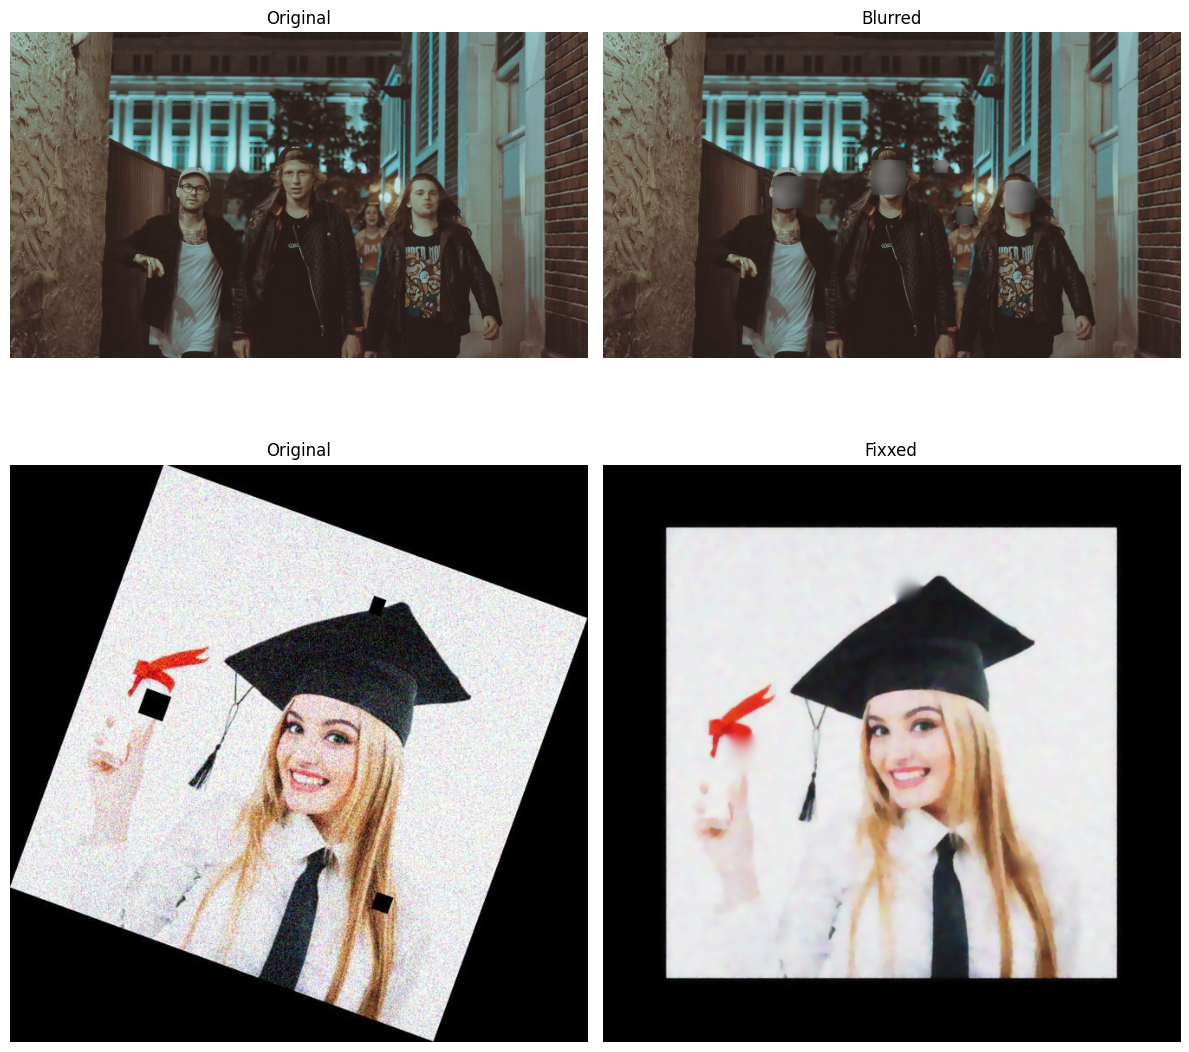

In [124]:
group = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_music_group.jpg')
corrupted = io.imread('/content/drive/My Drive/DL_24-25/Data/w05_graduation.jpg')

trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(xml_file=trained_file)

group_gray = color.rgb2gray(group)
detected = detector.detect_multi_scale(
  img=group_gray,
  scale_factor=1.2,
  step_ratio=1,
  min_size=(10, 10),
  max_size=(100, 100)
)

blur_group = group.copy()
for d in detected:
  r, c, w, h = d['r'], d['c'], d['width'], d['height']

  face = blur_group[r:r+h, c:c+w]
  blurred_face = filters.gaussian(face, sigma=10)

  blur_group[r:r+h, c:c+w] = blurred_face * 255



rotated_img = rotate(corrupted, angle=20)
denoised_img = denoise_tv_chambolle(rotated_img, channel_axis=-1)

corrupted_mask = np.zeros(denoised_img.shape[:2])
corrupted_mask[110:160, 330:370] = 1
corrupted_mask[310:360, 140:180] = 1
corrupted_mask[450:480, 470:500] = 1

corrupted_inpainted = inpaint_biharmonic(denoised_img, corrupted_mask, channel_axis=-1)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(group)
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

axes[0, 1].imshow(blur_group)
axes[0, 1].set_title("Blurred")
axes[0, 1].axis('off')

axes[1, 0].imshow(corrupted)
axes[1, 0].set_title("Original")
axes[1, 0].axis('off')

axes[1, 1].imshow(corrupted_inpainted)
axes[1, 1].set_title("Fixxed")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
